In [1]:
import numpy as np
import pandas as pd


names = ['#Date_flow', 'start', 'Durat', 'Prot', 'Src_IP_Addr:Port', 'Dst_IP_Addr:Port', 'Flags', 'Tos', 'Packets', 'Bytes', 'Flows', 'Label']
data = pd.read_csv('./data/capture20110818.pcap.netflow.labeled', header=0, sep='\s+')
data.head()

,Date,flow,start,Durat,Prot,Src,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Flags,Tos,Packets,Bytes,Flows,Label,Labels
0,2011-08-18,10:19:13.328,0.002,TCP,147.32.86.166:33426,->,212.24.150.110:25443,FRPA_,0,4,321,1,Background,NaN,NaN,NaN,NaN,NaN
1,2011-08-18,10:19:13.328,4.995,UDP,82.39.2.249:41915,->,147.32.84.59:43087,INT,0,617,40095,1,Background,NaN,NaN,NaN,NaN,NaN
2,2011-08-18,10:19:13.329,4.996,UDP,147.32.84.59:43087,->,82.39.2.249:41915,INT,0,1290,1909200,1,Background,NaN,NaN,NaN,NaN,NaN
3,2011-08-18,10:19:13.330,0.000,TCP,147.32.86.166:42020,->,147.32.192.34:993,A_,0,1,66,1,Background,NaN,NaN,NaN,NaN,NaN
4,2011-08-18,10:19:13.330,0.000,TCP,212.24.150.110:25443,->,147.32.86.166:33426,FPA_,0,2,169,1,Background,NaN,NaN,NaN,NaN,NaN


In [2]:
data.drop(labels=['Src', 'Packets', 'Bytes', 'Flows', 'Label', 'Labels'], axis=1, inplace=True)
data.to_csv('./data/capture20110818.pcap.netflow.labeled.remastered', header=names, index=False)
data.head()

,Date,flow,start,Durat,Prot,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Flags,Tos
0,2011-08-18,10:19:13.328,0.002,TCP,147.32.86.166:33426,212.24.150.110:25443,FRPA_,0,4,321,1,Background
1,2011-08-18,10:19:13.328,4.995,UDP,82.39.2.249:41915,147.32.84.59:43087,INT,0,617,40095,1,Background
2,2011-08-18,10:19:13.329,4.996,UDP,147.32.84.59:43087,82.39.2.249:41915,INT,0,1290,1909200,1,Background
3,2011-08-18,10:19:13.330,0.000,TCP,147.32.86.166:42020,147.32.192.34:993,A_,0,1,66,1,Background
4,2011-08-18,10:19:13.330,0.000,TCP,212.24.150.110:25443,147.32.86.166:33426,FPA_,0,2,169,1,Background


In [3]:
data = pd.read_csv('./data/capture20110818.pcap.netflow.labeled.remastered')
data[['Src_IP_Addr', 'Src_Port']] = data['Src_IP_Addr:Port'].str.split(':', n=1, expand=True)
data[['Dst_IP_Addr', 'Dst_Port']] = data['Dst_IP_Addr:Port'].str.split(':', n=1, expand=True)

data['Datetime'] = data['#Date_flow'].str.cat(data['start'], sep=' ')
data['Datetime'] = pd.to_datetime(data['Datetime'], infer_datetime_format=True)

data.drop(labels=['#Date_flow', 'start', 'Src_IP_Addr:Port', 'Dst_IP_Addr:Port'], axis=1, inplace=True)
data.head()

,Durat,Prot,Flags,Tos,Packets,Bytes,Flows,Label,Src_IP_Addr,Src_Port,Dst_IP_Addr,Dst_Port,Datetime
0,0.002,TCP,FRPA_,0,4,321,1,Background,147.32.86.166,33426,212.24.150.110,25443,2011-08-18 10:19:13.328
1,4.995,UDP,INT,0,617,40095,1,Background,82.39.2.249,41915,147.32.84.59,43087,2011-08-18 10:19:13.328
2,4.996,UDP,INT,0,1290,1909200,1,Background,147.32.84.59,43087,82.39.2.249,41915,2011-08-18 10:19:13.329
3,0.000,TCP,A_,0,1,66,1,Background,147.32.86.166,42020,147.32.192.34,993,2011-08-18 10:19:13.330
4,0.000,TCP,FPA_,0,2,169,1,Background,212.24.150.110,25443,147.32.86.166,33426,2011-08-18 10:19:13.330


In [59]:
data.to_pickle('./data/scenario_10.pkl')

In [4]:
infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206''147.32.84.207','147.32.84.208','147.32.84.209']

In [5]:
# Storing the mapping used for the conversion, in case we want to revert back 
label_mapping = {}

# Convert currency code in order to 'amount' in a single code

# Convert all the rest columns which are of type 'object'
char_cols = ['Prot', 'Flags']
print(char_cols)

for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])

# Uncomment this line, if you want to see the mapppings for the conversion
label_mapping

['Prot', 'Flags']


{'Prot': Index(['TCP', 'UDP', 'ICMP', 'PIM', 'RTP', 'ARP', 'IPX/SPX', 'RTCP', 'IGMP',
        'IPV6-ICMP', 'IPV6', 'ESP', 'LLC', 'UDT'],
       dtype='object'),
 'Flags': Index(['FRPA_', 'INT', 'A_', 'FPA_', 'PA_', 'URP', '_FSPA', 'S_', 'SPA_',
        'RA_', 'FA_', 'SRPA_', 'R_', 'FSPA_', 'RED', 'SA_', 'URN', 'ECO',
        '_FSA', 'FSRPA_', 'URFIL', 'URH', 'FRA_', 'CON', 'FSA_', 'RPA_',
        '_FSRPA', 'ECR', 'FS_', 'TXD', 'SEC_', 'SR_', 'FSRA_', 'F_', 'URHPRO',
        'NNS', 'SRA_', 'SRC', '_FSRA', 'AC_', 'NRA', 'SPAC_', 'PAC_', 'FSAU_',
        'FSRPAC_', 'URO', 'FRPAC_', 'RC_', 'URNPRO', 'FSPAC_', 'URF', 'FPAC_',
        'FSR_', '_FSPAC', 'FSPAEC_', 'FAU_', 'MAS', 'TST', 'IRR', 'RTS', 'RTA',
        'IRQ', 'UNK', 'MSR', 'TSR', 'SEC', 'ROB', 'MRQ', 'IAH', 'DNQ', 'PTB',
        'PAR', 'WAY', 'PHO', '___', 'AHA', 'NRS', 'MHR', 'UR', 'NNA', 'MRP',
        'TRC', 'DCE', 'SKP', 'DNP', 'URPRE', 'URS', 'URNU', 'URCUT', 'URISO',
        'URHTOS', 'URHU', 'FRAC_', 'SRC_', 'RPA_FRPA'],
  

In [12]:
data_nobground = data[data['Label']!= 'Background']
# data_infected = data_nobground[np.logical_or(data_nobground['Src_IP_Addr'] == infected_hosts[0], data_nobground['Dst_IP_Addr']==infected_hosts[0])]
data_nobground['Infected'] = data_nobground['Src_IP_Addr']==infected_hosts[0]
data_infected = data_nobground[data_nobground['Infected']==1]
data_infected.dtypes
print("Number of infected Netflows: ", len(data_infected))

Number of infected Netflows:  19889


/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
np.sum(data_nobground['Infected']==1)

19889

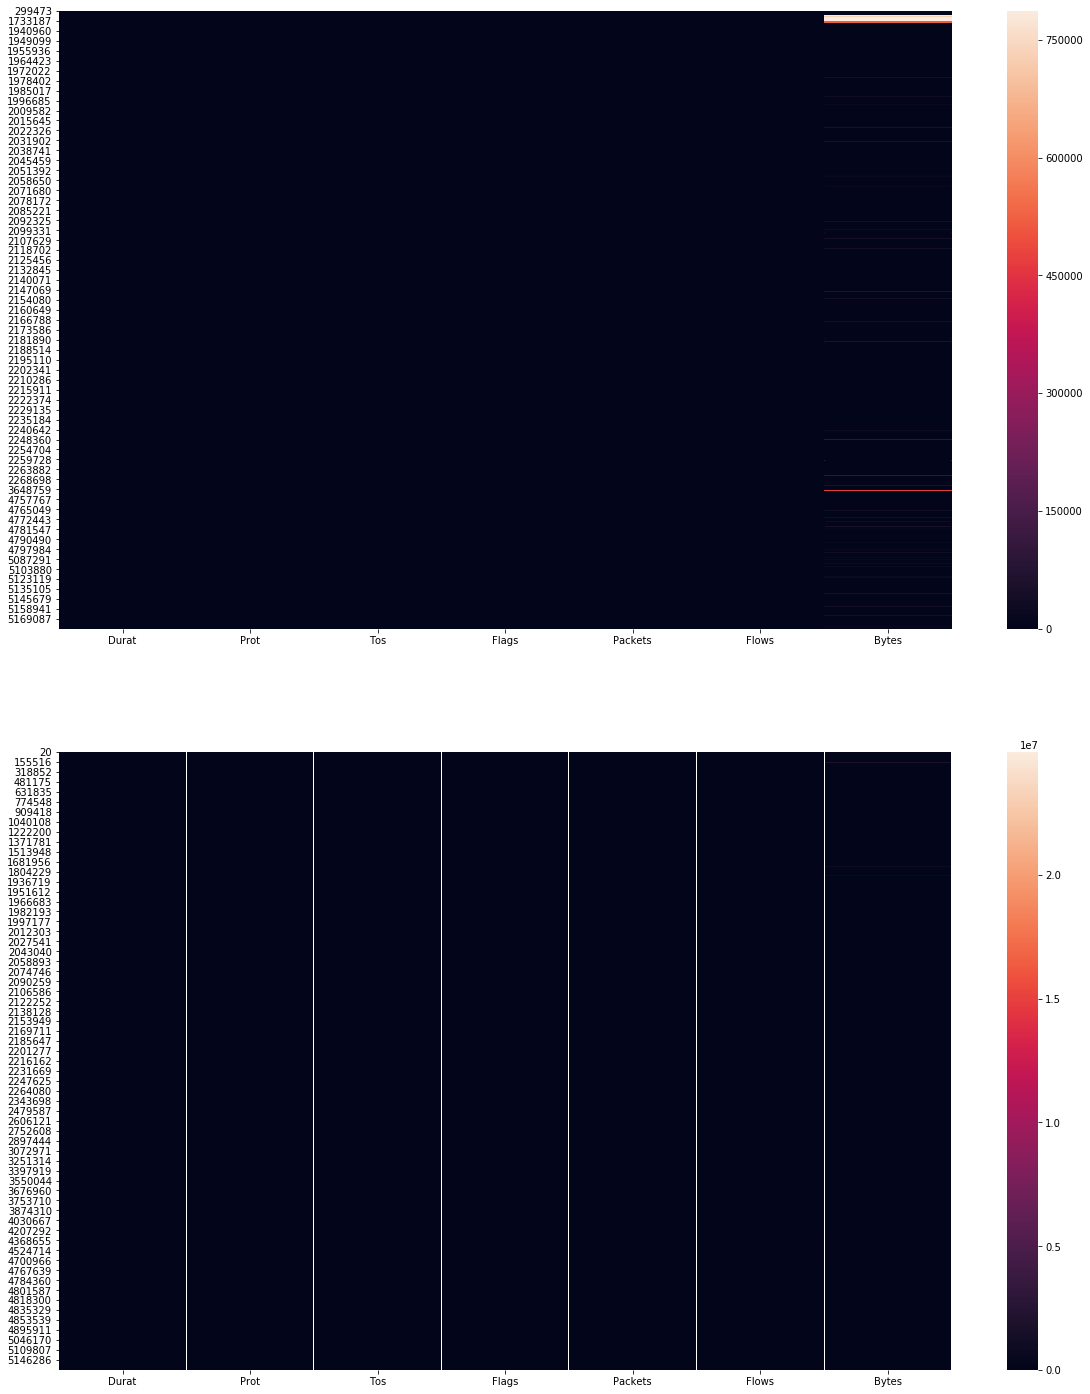

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

columns = ['Durat', 'Prot', 'Tos', 'Flags', 'Packets', 'Flows', 'Bytes']

data_clean = data_nobground[data_nobground['Infected'] == 0]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,25))    
sns.heatmap(data_infected[columns], ax=ax[0])
sns.heatmap(data_clean[columns], ax=ax[1])

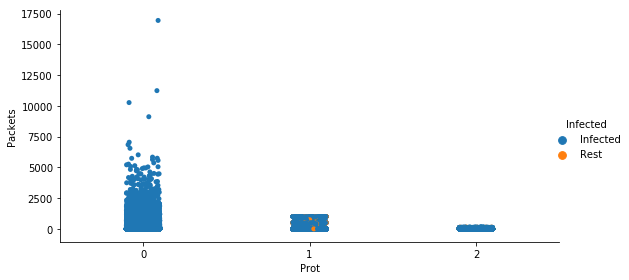

In [20]:
g = sns.catplot(x='Prot', y='Packets', hue='Infected', data=data_nobground, height=4, aspect=2, legend_out=True)
labels = ['Infected', 'Rest']
for t, l in zip(g._legend.texts, labels): t.set_text(l)

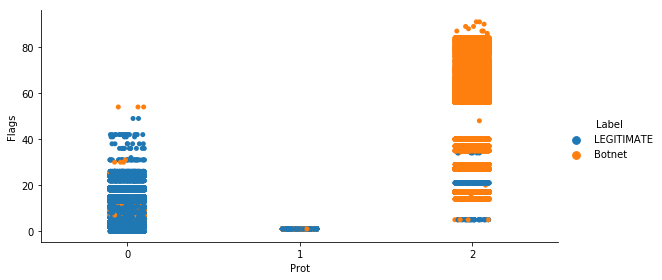

In [79]:
sns.catplot(x='Prot', y='Flags', hue='Label', data=data_nobground, height=4, aspect=2)

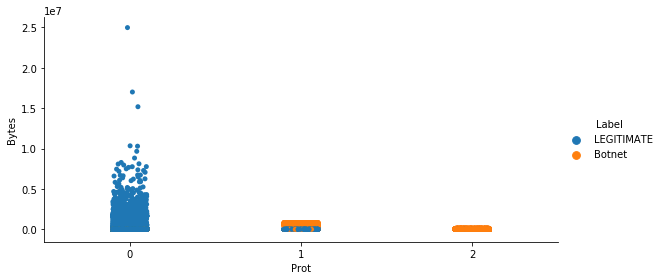

In [80]:
sns.catplot(x='Prot', y='Bytes', hue='Label', data=data_nobground, height=4, aspect=2)

Text(0, 0.5, 'Sum of squared distances')

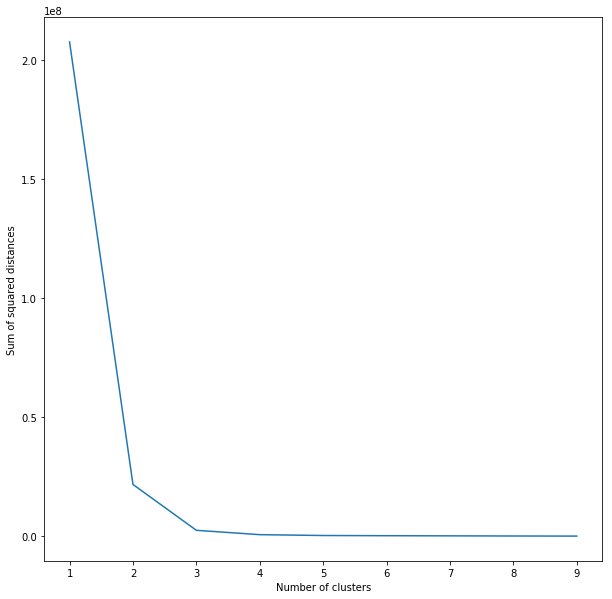

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

num_clusters = np.arange(1,10, dtype=int)
val = data_infected['Packets'].values

inertia = []
for n in num_clusters:
    km = KMeans(n, n_jobs=-1)
    km.fit(val[...,np.newaxis])
    inertia.append(km.inertia_)

plt.figure(figsize=(10,10))
plt.plot(num_clusters, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

In [22]:
ordinal_ranks = np.linspace(0, 1, 2, endpoint=False)
ordinal_ind = np.ceil(ordinal_ranks[1:] * len(data_infected))
ordinal_val = np.array(sorted(val))[ordinal_ind.astype(int)]
print(ordinal_val)

[1]


In [51]:
ordinal_val = np.array([1, 10])

def discretize_ordinal(val, ordinal_val):
    if len(val)==1:
        disc = val>ordinal_val
    else: 
        disc = []
        for v in val:
            for i in range(len(ordinal_val)):
                if v<=ordinal_val[i]:
                    disc.append(i)
                    break
                if i==len(ordinal_val)-1:
                    disc.append(i+1)
    return np.array(disc)
disc = discretize_ordinal(val, ordinal_val)
# data_infected['Disc_packets'] = disc

In [35]:
feat = ['Prot', 'Disc_packets']
values = data_infected[feat].values
spacecize = 1
M = np.zeros(values.shape[1])
for j in range(values.shape[1]):
    M[j] = len(np.unique(values[:,j]))
spacesize = np.prod(M)
print("M: ", M)
print("Spacesize: ", spacesize)

code = np.zeros(values.shape[0])
for i in range(values.shape[0]):
    s = spacesize
    for j in range(values.shape[1]):
        code[i] = code[i] + values[i,j] * s/M[j]
        s = s / M[j]

M:  [3. 3.]
Spacesize:  9.0


In [43]:
def extract_code(values):
    M = np.zeros(values.shape[1])
    for j in range(values.shape[1]):
        M[j] = len(np.unique(values[:,j]))
    spacesize = np.prod(M)

    code = np.zeros(values.shape[0])
    for i in range(values.shape[0]):
        s = spacesize
        for j in range(values.shape[1]):
            code[i] = code[i] + values[i,j] * s/M[j]
            s = s / M[j]
    return code, M

In [69]:
infected_values = data_infected[feat].values

infected_code, _ = extract_code(infected_values)

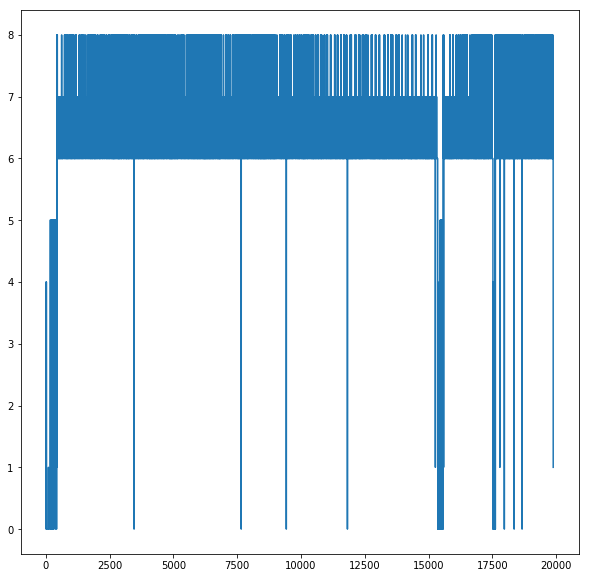

In [70]:
plt.figure(figsize=(10,10))
plt.plot(infected_code)

In [71]:
values = data_clean['Prot'].values
disc = discretize_ordinal(data_clean['Packets'].values, ordinal_val)
values = np.append(values[...,np.newaxis], disc[...,np.newaxis], axis=1)

test_code,_ = extract_code(values)
test_labels = data_clean['Label'].values == 'Botnet'

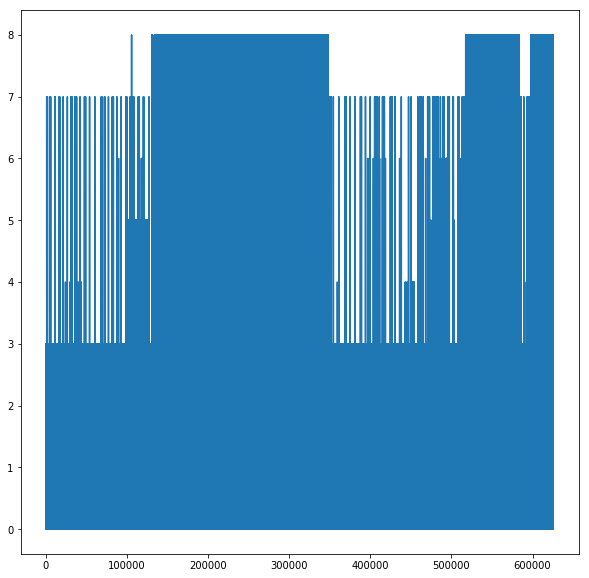

In [72]:
plt.figure(figsize=(10,10))
plt.plot(code)

In [73]:
np.save('./data/infected_code.npy', infected_code)
np.save('./data/test_code.npy', test_code)
np.save('./data/test_labels.npy', test_labels)